In [1]:
import torch
from sklearn.decomposition import PCA
from workshop_AI_Pulse.vectorizer import NumberVectorizer, TextVectorizer 

# Initialize vectorizer
sigmoid_number_vectorizer = NumberVectorizer(method="sigmoid", merge="+")
sinusoid_number_vectorizer = NumberVectorizer(method="sinusoid", merge="+")
logarithmic_number_vectorizer = NumberVectorizer(method="logarithmic", merge="+")
text_vectorizer = TextVectorizer()

/Users/alexpsq/opt/anaconda3/envs/workshop_neuralk/lib/python3.10/site-packages/sentence_transformers/cross_encoder/CrossEncoder.py:13: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from tqdm.autonotebook import tqdm, trange


## Experiment 1: Representing Standalone Numbers

In [2]:
from workshop_AI_Pulse.utils import plot_experiment_1

# Generate standalone numbers
numbers = [ 30, 40, 50, 50.5, 60, 70, 80, 90, 100, 102.31, 110, 120, 130, 140]



In [3]:

# Text embeddings (simulated for comparison)
text_embeddings = text_vectorizer.encode(numbers) 

# Number embeddings
sigmoid_number_embeddings = sigmoid_number_vectorizer.encode(numbers, threshold=0)
sinusoid_number_embeddings = sinusoid_number_vectorizer.encode(numbers, threshold=0)
logarithmic_number_embeddings = logarithmic_number_vectorizer.encode(numbers, threshold=0)


torch.Size([14, 384])


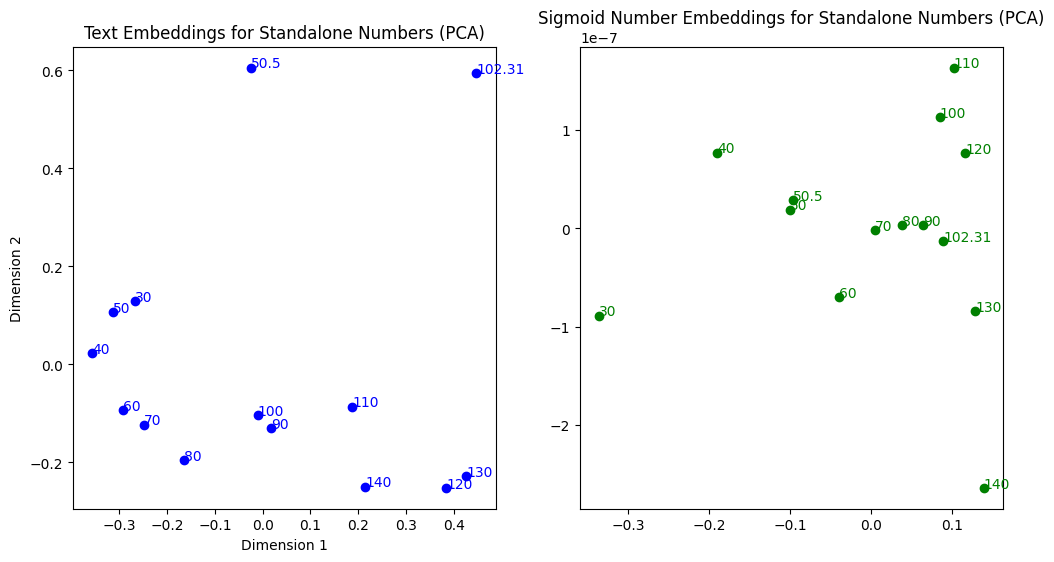

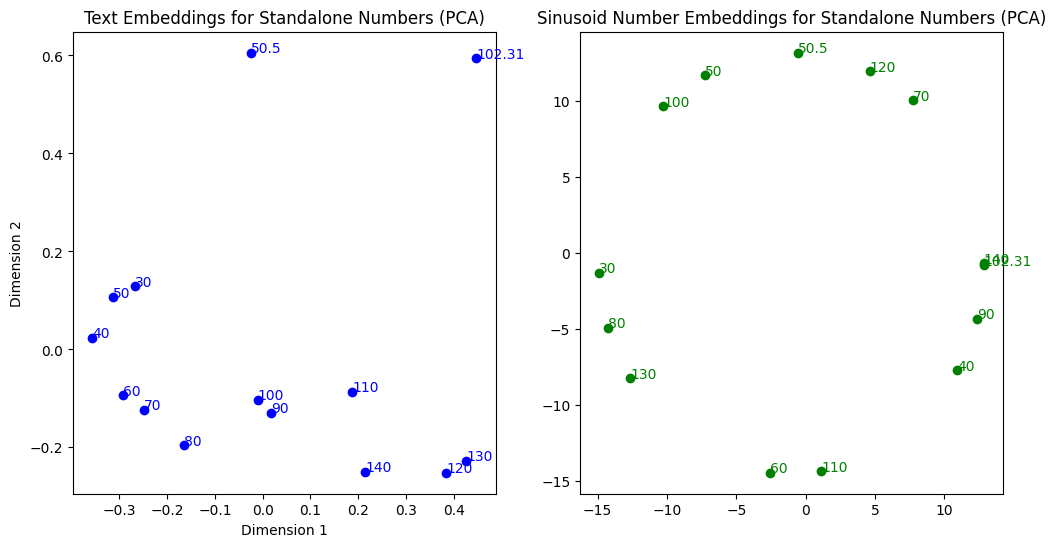

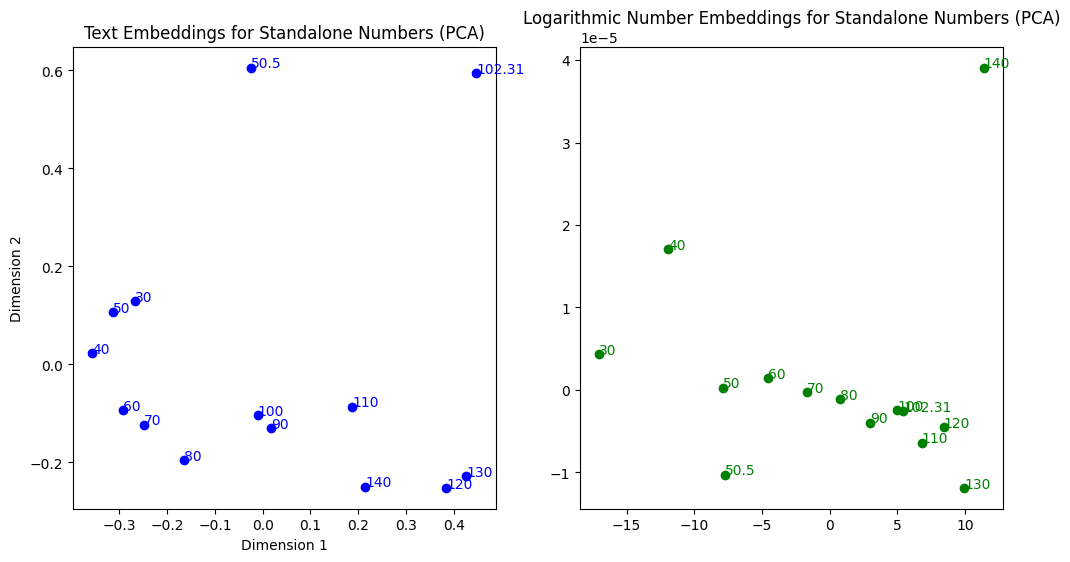

In [4]:
# Apply PCA to reduce both embeddings to 2D
pca = PCA(n_components=2)
text_embeddings_pca = pca.fit_transform(text_embeddings.numpy())
sigmoid_number_embeddings_pca = pca.fit_transform(sigmoid_number_embeddings.detach().numpy())
sinusoid_number_embeddings_pca = pca.fit_transform(sinusoid_number_embeddings.detach().numpy())
logarithmic_number_embeddings_pca = pca.fit_transform(logarithmic_number_embeddings.detach().numpy())


# Plot the results
plot_experiment_1(
    numbers, 
    text_embeddings_pca, 
    sigmoid_number_embeddings_pca, 
    title1="Text Embeddings for Standalone Numbers (PCA)",
    title2="Sigmoid Number Embeddings for Standalone Numbers (PCA)"
)
# Plot the results
plot_experiment_1(
    numbers, 
    text_embeddings_pca, 
    sinusoid_number_embeddings_pca, 
    title1="Text Embeddings for Standalone Numbers (PCA)",
    title2="Sinusoid Number Embeddings for Standalone Numbers (PCA)"
)
# Plot the results
plot_experiment_1(
    numbers, 
    text_embeddings_pca, 
    logarithmic_number_embeddings_pca, 
    title1="Text Embeddings for Standalone Numbers (PCA)",
    title2="Logarithmic Number Embeddings for Standalone Numbers (PCA)"
)

## Experiment 2: Representing Numbers in Text

In [5]:
from sklearn.manifold import TSNE

from workshop_AI_Pulse.utils import plot_experiment_2

text_vectorizer = TextVectorizer()
tsne = TSNE(n_components=2, random_state=42, perplexity=3)

# Generate synthetic text with numbers
text_samples = [
    "The temperature today is 5 degrees",
    "The temperature today is 5.5 degrees",
    "The temperature today is 7 degrees",
    "The temperature today is 70 degrees",
    "The temperature today is 10000 degrees",
    "I rated the movie 1 star",
    "I rated the movie 2 stars",
    "I rated the movie 3 stars",
    "I rated the movie 4 stars",
    "There were 100 participants",
    "There were 10 participants",
    "There were 0 participant",
    "There were no participant",
]

# Encode text with standard embeddings (simulated)
standard_text_embeddings = text_vectorizer.encode(text_samples)
standard_text_embeddings_pca = tsne.fit_transform(standard_text_embeddings.numpy())


/Users/alexpsq/opt/anaconda3/envs/workshop_neuralk/lib/python3.10/site-packages/threadpoolctl.py:1214: RuntimeWarning: 
Found Intel OpenMP ('libiomp') and LLVM OpenMP ('libomp') loaded at
the same time. Both libraries are known to be incompatible and this
can cause random crashes or deadlocks on Linux when loaded in the
same Python program.
Using threadpoolctl may cause crashes or deadlocks. For more
information and possible workarounds, please see
    https://github.com/joblib/threadpoolctl/blob/master/multiple_openmp.md

  warnings.warn(msg, RuntimeWarning)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


In [6]:

# Custom embeddings using the vectorizer
custom_text_embeddings = []
a = [
   "The temperature today is 5 degrees",
    "The temperature today is 5.5 degrees",
    "The temperature today is 7 degrees",
    "The temperature today is 70 degrees",
    "The temperature today is 10000 degrees",
]
b = [
    "I rated the movie 1 star",
    "I rated the movie 2 stars",
    "I rated the movie 3 stars",
    "I rated the movie 4 stars",
]
c = [
    "There were 100 participants",
    "There were 10 participants",
    "There were 0 participant",
    "There were no participant",
]
for k, i in zip([a, b, c], [5, 50, 0]):
    custom_text_embeddings.append(sigmoid_number_vectorizer.encode(k, threshold=i))  # Full-dimensional custom embeddings
custom_text_embeddings = torch.cat(custom_text_embeddings, dim=0)

custom_text_embeddings = torch.nan_to_num(custom_text_embeddings)
custom_text_embeddings_pca = tsne.fit_transform(custom_text_embeddings.detach().numpy())


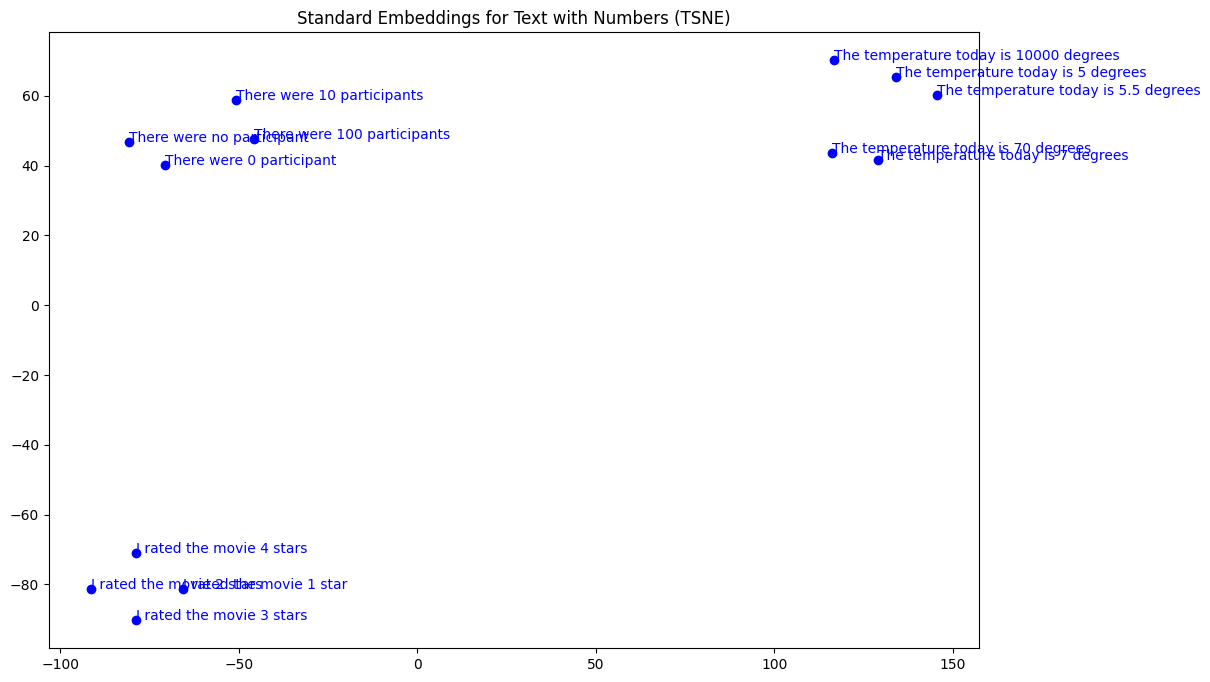

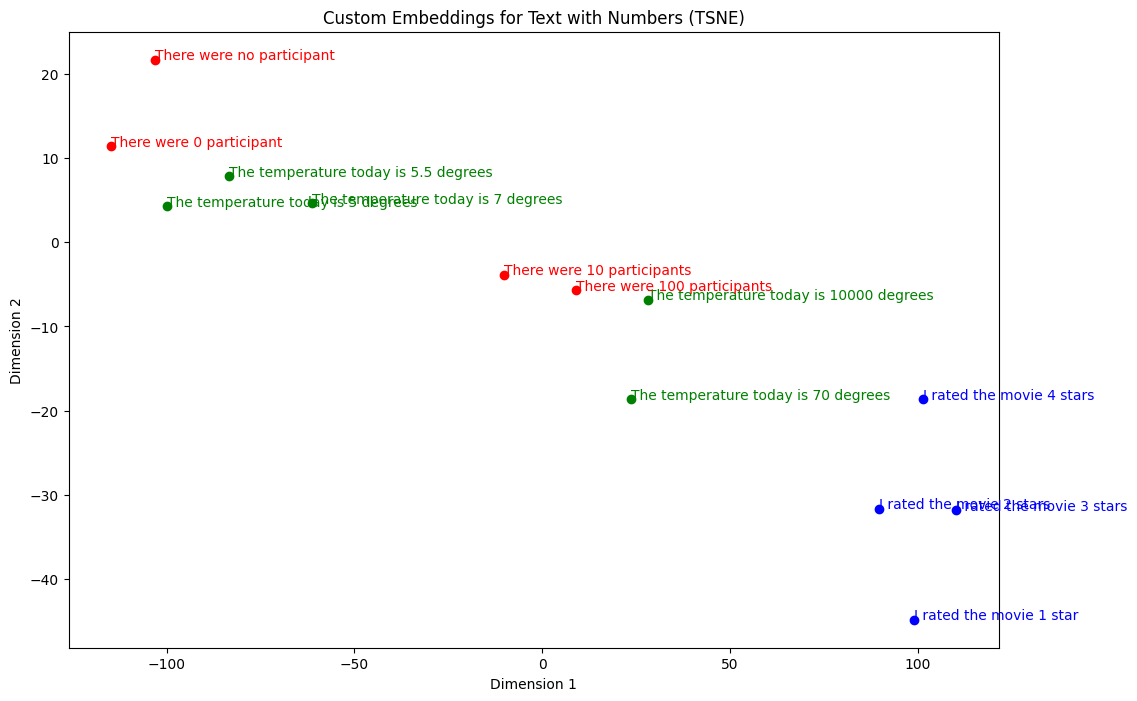

In [7]:
plot_experiment_2(text_samples, standard_text_embeddings_pca, custom_text_embeddings_pca)

## Experiment 3: Quantitative Reasoning

### Embedding evaluation for numbers

In [8]:
from workshop_AI_Pulse.utils import plot_experiment_3

numbers = torch.randn(100)
numbers_in_text = [f"The temperature today is {i} degrees" for i in numbers]

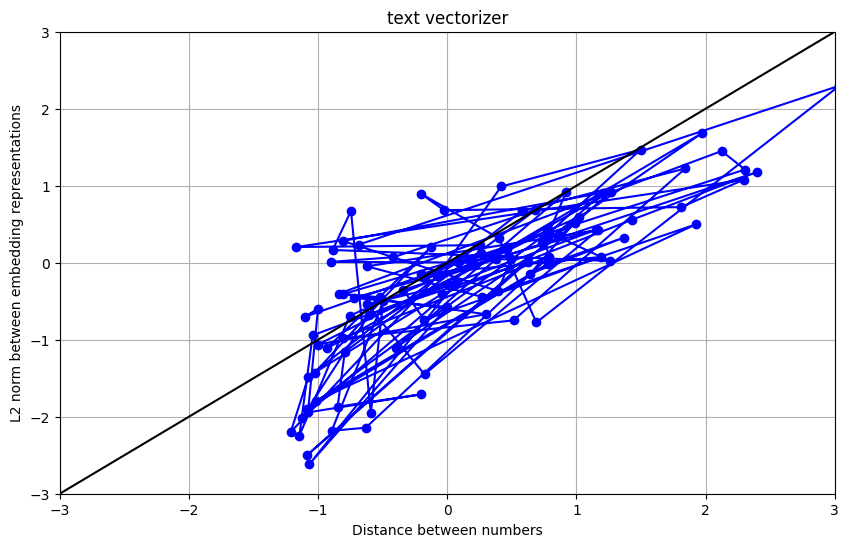

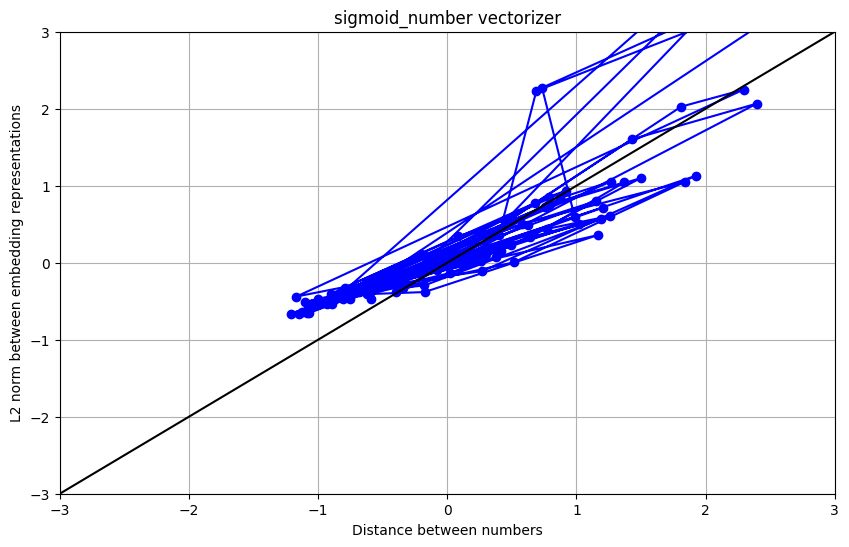

torch.Size([100, 384])


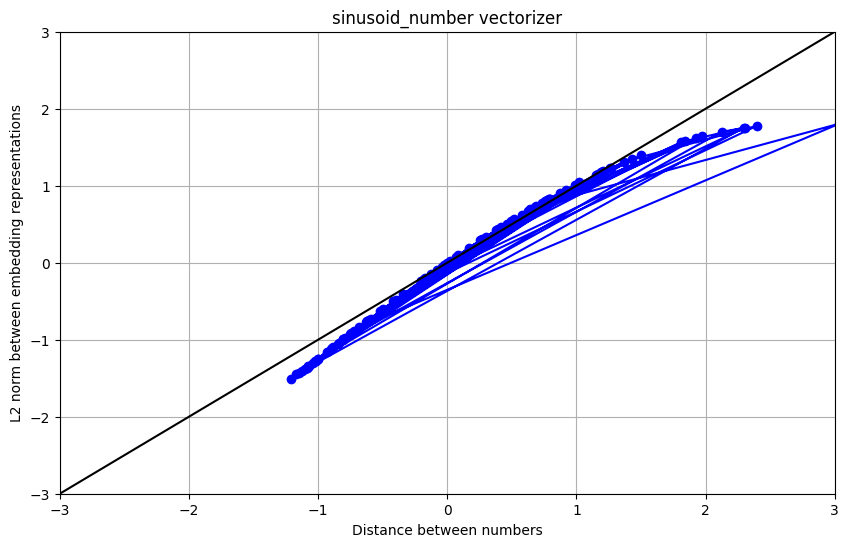

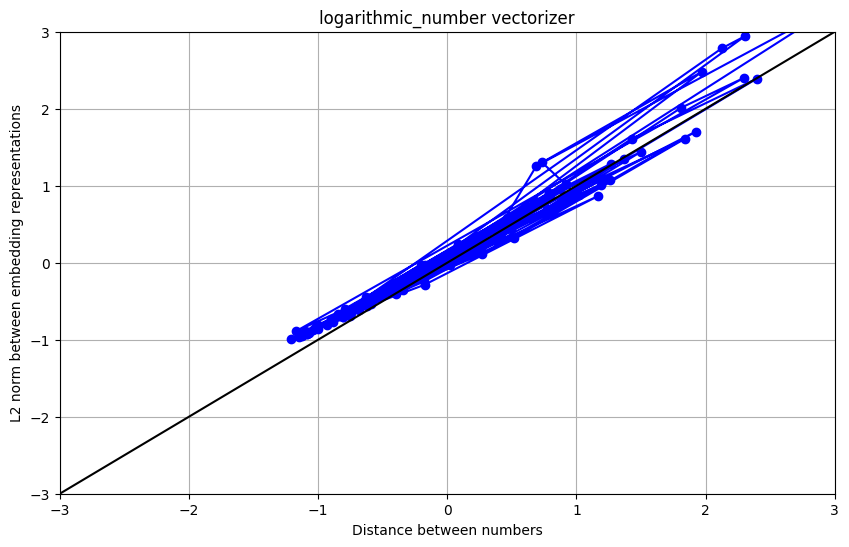

In [9]:

plot_experiment_3(text_vectorizer, numbers=numbers, numbers_in_text=numbers_in_text, title="text vectorizer")
plot_experiment_3(sigmoid_number_vectorizer, numbers=numbers, numbers_in_text=numbers_in_text, title="sigmoid_number vectorizer", **{'threshold': torch.min(numbers)})
plot_experiment_3(sinusoid_number_vectorizer, numbers=numbers, numbers_in_text=numbers_in_text, title="sinusoid_number vectorizer")
plot_experiment_3(logarithmic_number_vectorizer, numbers=numbers, numbers_in_text=numbers_in_text, title="logarithmic_number vectorizer")
